In [1]:
import pandas as pl
import json

json_data = json.load(open("results_new.json"))
json_data
dfs = {k: pl.DataFrame({"latency": json_data[k]}) for k in json_data.keys()}
categories = [k for k in json_data.keys()]
dfs
df = pl.DataFrame(json_data)
df

,A1/accurate.cpp,A1/accurate_cpu_aff.cpp,A1/shared_mem.cpp,A2/semaphore.cpp,A3_A4/threads.cpp,A3_A4/server_client.cpp,A3_A4/server_client_tcp.cpp,A3_A4/docker
0,122.0,228.0,111.0,1123.0,44585.0,60979,40637673,445065
1,122.0,210.0,111.0,678.0,103769.0,56796,82167,79982
2,122.0,217.0,110.0,748.0,64196.0,58586,82182,79904
3,122.0,220.0,112.0,760.0,95531.0,56160,82195,79999
4,122.0,235.0,113.0,729.0,86866.0,58639,82399,79805
...,...,...,...,...,...,...,...,...
195,122.0,454.0,112.0,680.0,109142.0,56744,82256,81215
196,124.0,218.0,111.0,684.0,36289.0,56884,82033,79291
197,124.0,221.0,113.0,157.0,31978.0,56210,82207,79752
198,124.0,215.0,111.0,689.0,118200.0,55923,81663,79472


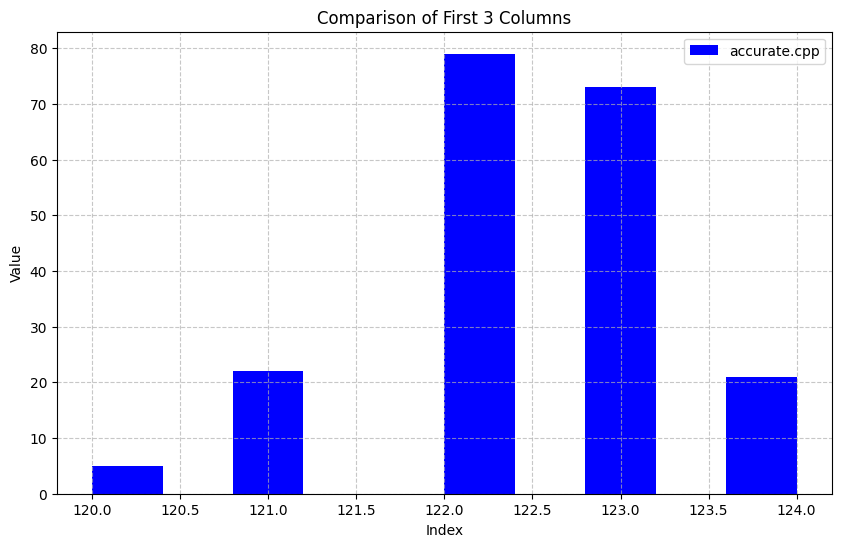

In [2]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot each column with a different color
plt.hist(df['A1/accurate.cpp'], color='blue', label='accurate.cpp')
# plt.hist(df['A1/accurate_cpu_aff.cpp'], color='red', label='accurate_cpu_aff.cpp')
# plt.hist(df['A1/shared_mem.cpp'], color='green', label='shared_mem.cpp')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of First 3 Columns')
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [13]:
import numpy as np
from scipy import stats

def calculate_lognormal_ci(data, confidence=0.95):
    """
    Calculate the mean and confidence interval of a log-normal distributed data.

    Parameters:
    data (array-like): The data to calculate the mean and confidence interval for.
    confidence (float, optional): The desired confidence level for the interval. Default is 0.95.

    Returns:
    tuple: A tuple containing the mean, lower bound of the confidence interval, and upper bound of the confidence interval.

    """
    
    # Convert to log space
    log_data = np.log(data)

    # Calculate mean and standard error in log space
    n = len(log_data)
    mean_log = np.mean(log_data)
    se_log = stats.sem(log_data)

    # Calculate CI in log space
    ci_log = stats.t.interval(confidence, n-1, mean_log, se_log)

    # Transform back to original scale
    ci = np.exp(ci_log)
    mean = np.exp(mean_log)

    return mean, ci[0], ci[1]

def calculate_percentiles(data, percentiles=[1,99]):
    """
    Calculate the percentiles of a given data.

    Parameters:
    data (array-like): The data to calculate the percentiles for.
    percentiles (list, optional): The percentiles to calculate. Default is [2.5, 97.5].

    Returns:
    dict: A dictionary containing the requested percentiles.

    """
    
    # Calculate the percentiles
    result = np.percentile(data, percentiles)

    return {f'{p}%': result[i] for i, p in enumerate(percentiles)}

# Calculate CI for each column
results = {}
for column in df.columns:
    mean, ci_lower, ci_upper = calculate_lognormal_ci(df[column])
    percentiles = calculate_percentiles(df[column])
    results[column] = {
        'mean': mean,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        **percentiles
    }

# Convert results to a DataFrame for better visualization
results_df = pl.DataFrame(results).T
results_df.columns = ['Mittelwert', 'Untere Grenze', 'Obere Grenze', '1\\% Quantil', '99\\% Quantil']

# Print results
print(results_df)


                               Mittelwert  Untere Grenze  Obere Grenze  \
A1/accurate.cpp                122.411635     122.284771    122.538630   
A1/accurate_cpu_aff.cpp        239.504309     232.516103    246.702543   
A1/shared_mem.cpp              111.973071     111.674080    112.272863   
A2/semaphore.cpp               671.073866     642.520571    700.896054   
A3_A4/threads.cpp            58380.933972   54368.137449  62689.906465   
A3_A4/server_client.cpp      57145.565670   56970.798814  57320.868650   
A3_A4/server_client_tcp.cpp  84733.471723   79705.510187  90078.605775   
A3_A4/docker                 80187.214142   78836.244311  81561.334741   

                             1\% Quantil  99\% Quantil  
A1/accurate.cpp                   120.00        124.00  
A1/accurate_cpu_aff.cpp           198.96        458.03  
A1/shared_mem.cpp                 110.00        114.00  
A2/semaphore.cpp                  153.00       1141.00  
A3_A4/threads.cpp                9775.43     178

In [14]:
results_df

,Mittelwert,Untere Grenze,Obere Grenze,1\% Quantil,99\% Quantil
A1/accurate.cpp,122.411635,122.284771,122.538630,120.00,124.00
A1/accurate_cpu_aff.cpp,239.504309,232.516103,246.702543,198.96,458.03
A1/shared_mem.cpp,111.973071,111.674080,112.272863,110.00,114.00
A2/semaphore.cpp,671.073866,642.520571,700.896054,153.00,1141.00
A3_A4/threads.cpp,58380.933972,54368.137449,62689.906465,9775.43,178870.71
A3_A4/server_client.cpp,57145.565670,56970.798814,57320.868650,54882.42,59572.21
A3_A4/server_client_tcp.cpp,84733.471723,79705.510187,90078.605775,81202.72,82859.96
A3_A4/docker,80187.214142,78836.244311,81561.334741,78796.68,80468.54


In [19]:
def print_latex_table(dataframe):
    print(r"\begin{table}[htb]")
    print(r"\centering")
    print(r"\begin{tabular}{lccccc}")
    print(r"\toprule")

    # Print header
    headers = dataframe.columns
    print("Implementierung &" + "& ".join(headers) + r" \\")

    print(r"\midrule")

    # Print rows
    for index, row in dataframe.iterrows():
        # Format index (implementation name)
        formatted_index = index.replace("_", r"\_")

        # Format all values with 2 decimal places
        formatted_values = [f"{val:.2f}" for val in row]

        # Combine index and values
        full_row = [formatted_index] + formatted_values

        # Join with & and add line ending
        print(" & ".join(full_row) + r" \\")

    print(r"\bottomrule")
    print(r"\end{tabular}")
    print(r"\caption{Gemessene Metriken und Konfidenzintervalle}")
    print(r"\label{tab:confidence-intervals}")
    print(r"\end{table}")

print_latex_table(results_df)

\begin{table}[htb]
\centering
\begin{tabular}{lccccc}
\toprule
Implementierung &Mittelwert& Untere Grenze& Obere Grenze& 1\% Quantil& 99\% Quantil \\
\midrule
A1/accurate.cpp & 122.41 & 122.28 & 122.54 & 120.00 & 124.00 \\
A1/accurate\_cpu\_aff.cpp & 239.50 & 232.52 & 246.70 & 198.96 & 458.03 \\
A1/shared\_mem.cpp & 111.97 & 111.67 & 112.27 & 110.00 & 114.00 \\
A2/semaphore.cpp & 671.07 & 642.52 & 700.90 & 153.00 & 1141.00 \\
A3\_A4/threads.cpp & 58380.93 & 54368.14 & 62689.91 & 9775.43 & 178870.71 \\
A3\_A4/server\_client.cpp & 57145.57 & 56970.80 & 57320.87 & 54882.42 & 59572.21 \\
A3\_A4/server\_client\_tcp.cpp & 84733.47 & 79705.51 & 90078.61 & 81202.72 & 82859.96 \\
A3\_A4/docker & 80187.21 & 78836.24 & 81561.33 & 78796.68 & 80468.54 \\
\bottomrule
\end{tabular}
\caption{Gemessene Metriken und Konfidenzintervalle}
\label{tab:confidence-intervals}
\end{table}


In [23]:
def convert_cycles_to_ns(dataframe):
    """
    Convert the cycle values in a DataFrame to nanoseconds.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the cycle values.

    Returns:
    DataFrame: A new DataFrame with the cycle values converted to nanoseconds.

    """
    
    # Define the frequency of the CPU in Hz
    frequency = 5.44e9

    # Convert cycles to nanoseconds
    ns_df = dataframe.copy()
    for column in ns_df.columns:
        ns_df[column] = ns_df[column] / frequency * 1e9

    return ns_df

results_ns = convert_cycles_to_ns(results_df)
print_latex_table(results_ns)
results_ns

\begin{table}[htb]
\centering
\begin{tabular}{lccccc}
\toprule
Implementierung &Mittelwert& Untere Grenze& Obere Grenze& 1\% Quantil& 99\% Quantil \\
\midrule
A1/accurate.cpp & 22.50 & 22.48 & 22.53 & 22.06 & 22.79 \\
A1/accurate\_cpu\_aff.cpp & 44.03 & 42.74 & 45.35 & 36.57 & 84.20 \\
A1/shared\_mem.cpp & 20.58 & 20.53 & 20.64 & 20.22 & 20.96 \\
A2/semaphore.cpp & 123.36 & 118.11 & 128.84 & 28.12 & 209.74 \\
A3\_A4/threads.cpp & 10731.79 & 9994.14 & 11523.88 & 1796.95 & 32880.65 \\
A3\_A4/server\_client.cpp & 10504.70 & 10472.57 & 10536.92 & 10088.68 & 10950.77 \\
A3\_A4/server\_client\_tcp.cpp & 15576.01 & 14651.75 & 16558.57 & 14926.97 & 15231.61 \\
A3\_A4/docker & 14740.30 & 14491.96 & 14992.89 & 14484.68 & 14792.01 \\
\bottomrule
\end{tabular}
\caption{Gemessene Metriken und Konfidenzintervalle}
\label{tab:confidence-intervals}
\end{table}


,Mittelwert,Untere Grenze,Obere Grenze,1\% Quantil,99\% Quantil
A1/accurate.cpp,22.502139,22.478818,22.525483,22.058824,22.794118
A1/accurate_cpu_aff.cpp,44.026527,42.741931,45.349732,36.573529,84.196691
A1/shared_mem.cpp,20.583285,20.528324,20.638394,20.220588,20.955882
A2/semaphore.cpp,123.359166,118.110399,128.841186,28.125000,209.742647
A3_A4/threads.cpp,10731.789333,9994.142913,11523.879865,1796.954044,32880.645221
A3_A4/server_client.cpp,10504.699572,10472.573311,10536.924384,10088.680147,10950.773897
A3_A4/server_client_tcp.cpp,15576.005831,14651.748196,16558.567238,14926.970588,15231.610294
A3_A4/docker,14740.296717,14491.956675,14992.892416,14484.683824,14792.011029


(np.float64(58380.9339715349), np.float64(54368.137449237285), np.float64(62689.90646536361))


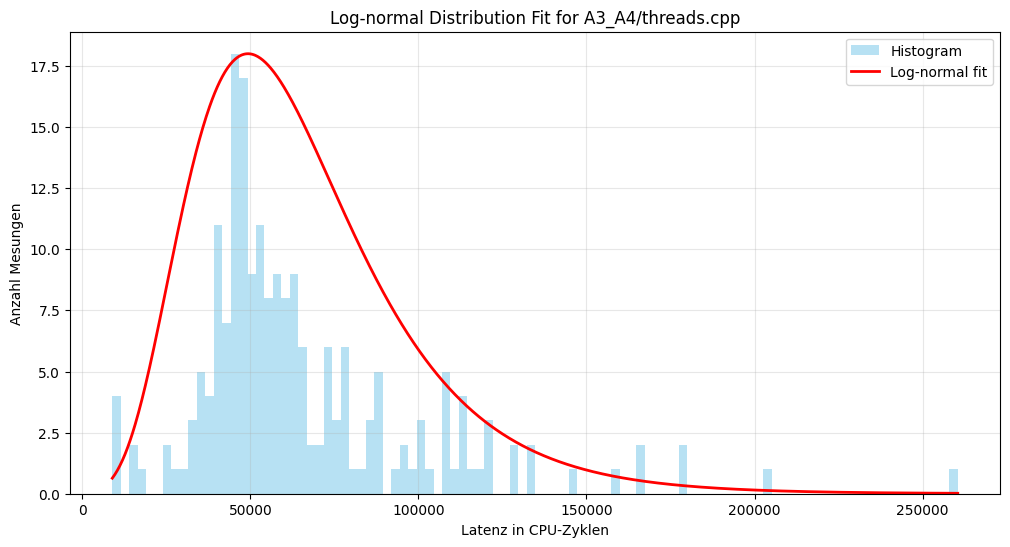

(np.float64(58380.9339715349), np.float64(54368.137449237285), np.float64(62689.90646536361))


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

CASE = 4

# Get the first column
data = df.iloc[:, CASE]
column_name = df.columns[CASE]

# Calculate log-normal parameters
log_data = np.log(data)
shape, loc, scale = stats.lognorm.fit(data)

# Calculate 95% CI using the percentile method
ci = calculate_lognormal_ci(data)
print(ci)
mean = ci[0]

# Create x values for plotting the distribution
x = np.linspace(min(data), max(data), 1000)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram and get the maximum height for scaling
hist, bins, _ = plt.hist(data, bins=100, density=False, alpha=0.6, color='skyblue', label='Histogram')
max_height = max(hist)

# Scale the PDF to match the histogram height
pdf_lognorm = pdf_lognorm * (max_height / max(pdf_lognorm))

# Plot the scaled fitted log-normal distribution
plt.plot(x, pdf_lognorm, 'r-', lw=2, label='Log-normal fit')

# Add vertical lines for CI
# plt.axvline(ci[1], color='g', linestyle='--', label='95% CI')
# plt.axvline(ci[2], color='g', linestyle='--')

# Add mean line
# plt.axvline(mean, color='k', linestyle='-', label='Mean')

# Customize the plot
plt.xlabel('Latenz in CPU-Zyklen')
plt.ylabel('Anzahl Mesungen')
plt.title(f'Log-normal Distribution Fit for {column_name}')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text box with statistics
# stats_text = f'Mean: {mean:.2f}\nCI: [{ci[1]:.2f}, {ci[2]:.2f}]'
# plt.text(0.95, 0.95, stats_text,
#          transform=plt.gca().transAxes,
#          verticalalignment='top',
#          horizontalalignment='right',
#          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()
print(ci)


# Normalverteilung scheint nicht akkurat zu sein (da symmetrisch)

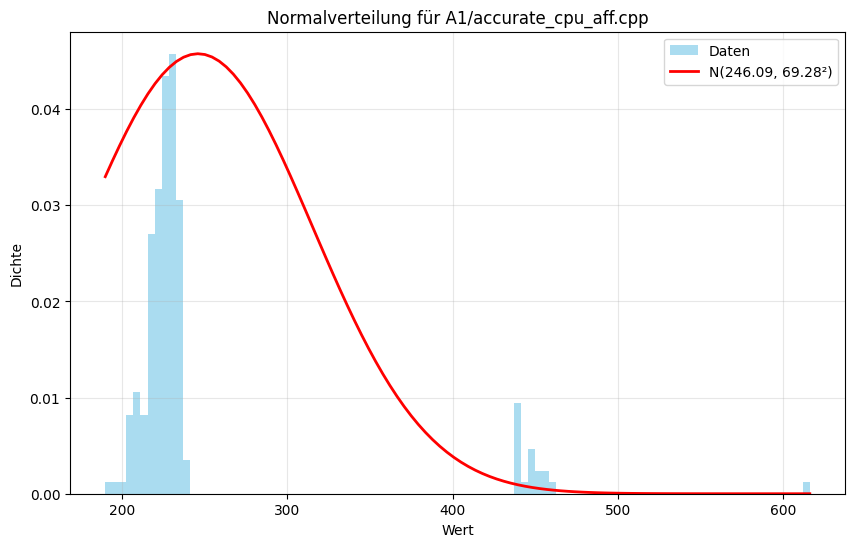

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_histogram_with_normal(data, bins=100, title=""):
    """
    Plottet ein Histogramm der Daten und die entsprechende Normalverteilungskurve.

    Parameters:
    data (list or numpy.array): Die Datenpunkte
    bins (int): Anzahl der Bins für das Histogramm
    title (str): Titel des Plots
    """

    # Konvertiere zu numpy array falls nötig
    data = np.array(data)

    # Berechne Mittelwert und Standardabweichung
    mu = np.mean(data)
    sigma = np.std(data)

    # Erstelle den Plot
    plt.figure(figsize=(10, 6))

    # Plotte Histogramm (normiert)
    counts, bins, _ = plt.hist(data, bins=bins, density=True, alpha=0.7, 
                              color='skyblue', label='Daten')
    max_height = max(counts)

    # Erstelle x-Werte für die Normalverteilungskurve
    x = np.linspace(min(data), max(data), 100)

    # Berechne und plotte die Normalverteilungskurve
    pdf = stats.norm.pdf(x, mu, sigma)
    pdf = pdf * (max_height / max(pdf))
    plt.plot(x, pdf, 'r-', lw=2, 
             label=f'N({mu:.2f}, {sigma:.2f}²)')

    # Beschriftungen
    plt.title(title)
    plt.xlabel('Wert')
    plt.ylabel('Dichte')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.show()

# Plotte Histogramm mit Normalverteilung für die erste Spalte
CASE = 1

# Get the first column
data = df.iloc[:, CASE]
column_name = df.columns[CASE]
plot_histogram_with_normal(data, title=f"Normalverteilung für {column_name}")

# Minimum?

(np.float64(239.5043087842997), np.float64(232.5161027107513), np.float64(246.70254342600762))


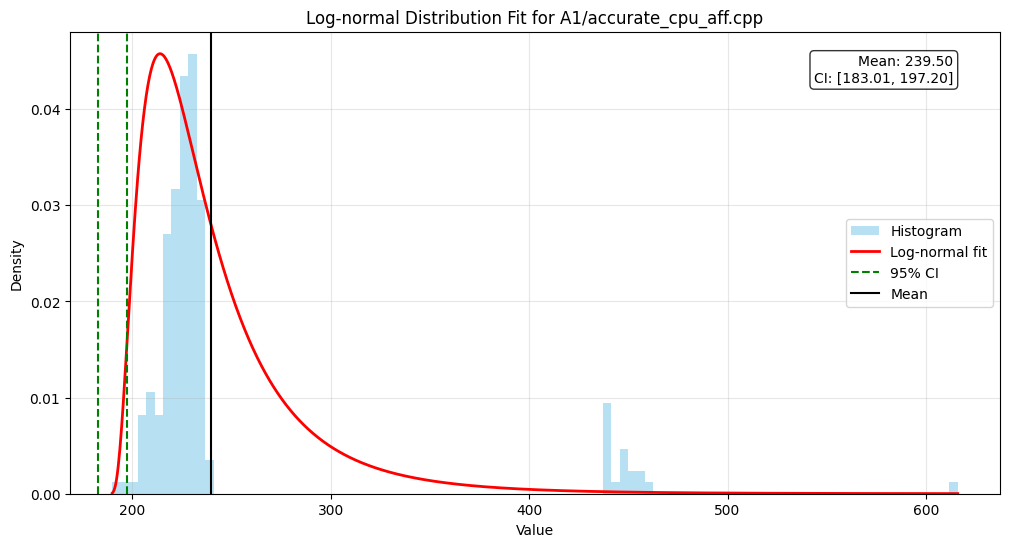

(np.float64(239.5043087842997), np.float64(232.5161027107513), np.float64(246.70254342600762))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

CASE = 1

# Get the first column
data = df.iloc[:, CASE]
column_name = df.columns[CASE]

# Calculate log-normal parameters
log_data = np.log(data)
shape, loc, scale = stats.lognorm.fit(data)

# Calculate 95% CI using the percentile method
ci = calculate_lognormal_ci(data)
print(ci)
mean = ci[0]

lower_diff = mean - ci[1]
upper_diff = ci[2] - mean

data_min = min(data)
ci_for_min = [data_min - lower_diff, data_min + upper_diff]

# Create x values for plotting the distribution
x = np.linspace(min(data), max(data), 1000)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram and get the maximum height for scaling
hist, bins, _ = plt.hist(data, bins=100, density=True, alpha=0.6, color='skyblue', label='Histogram')
max_height = max(hist)

# Scale the PDF to match the histogram height
pdf_lognorm = pdf_lognorm * (max_height / max(pdf_lognorm))

# Plot the scaled fitted log-normal distribution
plt.plot(x, pdf_lognorm, 'r-', lw=2, label='Log-normal fit')

# Add vertical lines for CI
plt.axvline(ci_for_min[0], color='g', linestyle='--', label='95% CI')
plt.axvline(ci_for_min[1], color='g', linestyle='--')

# Add mean line
plt.axvline(mean, color='k', linestyle='-', label='Mean')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Log-normal Distribution Fit for {column_name}')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text box with statistics
stats_text = f'Mean: {mean:.2f}\nCI: [{ci_for_min[0]:.2f}, {ci_for_min[1]:.2f}]'
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()
print(ci)
